In [90]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt 
# Load your classification-based data into a pandas DataFrame
data = pd.read_csv("TestDataWithId (1).csv")

data

,id,stoveId,state,safety,time_elapsed_1,avg_pan_temp_1,highest_pan_temp_1,lowest_pan_temp_1,avg_food_temp_1,highest_food_temp_1,...,avg_food_temp_19,highest_food_temp_19,lowest_food_temp_19,time_elapsed_20,avg_pan_temp_20,highest_pan_temp_20,lowest_pan_temp_20,avg_food_temp_20,highest_food_temp_20,lowest_food_temp_20
0,1,1,1,0,0,5.058053,5.058053,5.058053,5.058053,5.058053,...,41.890768,43.289742,39.882927,2964,34.885446,39.289244,15.081513,37.397093,38.138746,36.036844
1,2,1,1,0,0,6.970683,6.970683,6.970683,6.970683,6.970683,...,32.093759,32.093759,32.093759,3116,28.551736,28.551736,28.551736,28.551736,28.551736,28.551736
2,3,1,1,0,0,4.223977,4.223977,4.223977,4.223977,4.223977,...,16.848209,16.848209,16.848209,4370,14.418753,14.418753,14.418753,14.418753,14.418753,14.418753
3,4,1,1,0,0,14.654099,14.654099,14.654099,14.654099,14.654099,...,21.043289,21.043289,21.043289,2641,18.809256,18.809256,18.809256,18.809256,18.809256,18.809256
4,5,1,1,0,0,16.012112,16.012112,16.012112,16.012112,16.012112,...,20.042437,20.042437,20.042437,3781,18.332604,18.332604,18.332604,18.332604,18.332604,18.332604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,2,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,270.287408,276.243892,259.336612,513,271.411359,284.056303,117.291933,269.212247,278.394188,259.275608
85,86,2,1,1,0,13.947416,13.947416,13.947416,13.947416,13.947416,...,255.084698,261.645396,232.318602,551,253.582300,277.331933,130.068235,262.298764,275.997065,255.051854
86,87,2,1,1,0,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,146.382386,148.836448,142.477403,2242,209.933607,236.985714,35.254622,216.870742,228.050708,205.690775
87,88,2,1,1,0,5.501245,5.501245,5.501245,5.501245,5.501245,...,241.357881,262.572705,220.143057,380,264.555842,273.969748,64.169412,249.792213,267.367257,217.664194


In [91]:
data['state'].value_counts()

1    54
0    35
Name: state, dtype: int64

In [92]:

X = data.drop("state", axis=1)
y = data["state"]
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)


In [93]:
resampled_data

,id,stoveId,safety,time_elapsed_1,avg_pan_temp_1,highest_pan_temp_1,lowest_pan_temp_1,avg_food_temp_1,highest_food_temp_1,lowest_food_temp_1,...,highest_food_temp_19,lowest_food_temp_19,time_elapsed_20,avg_pan_temp_20,highest_pan_temp_20,lowest_pan_temp_20,avg_food_temp_20,highest_food_temp_20,lowest_food_temp_20,state
0,1,1,0,0,5.058053,5.058053,5.058053,5.058053,5.058053,5.058053,...,43.289742,39.882927,2964,34.885446,39.289244,15.081513,37.397093,38.138746,36.036844,1
1,2,1,0,0,6.970683,6.970683,6.970683,6.970683,6.970683,6.970683,...,32.093759,32.093759,3116,28.551736,28.551736,28.551736,28.551736,28.551736,28.551736,1
2,3,1,0,0,4.223977,4.223977,4.223977,4.223977,4.223977,4.223977,...,16.848209,16.848209,4370,14.418753,14.418753,14.418753,14.418753,14.418753,14.418753,1
3,4,1,0,0,14.654099,14.654099,14.654099,14.654099,14.654099,14.654099,...,21.043289,21.043289,2641,18.809256,18.809256,18.809256,18.809256,18.809256,18.809256,1
4,5,1,0,0,16.012112,16.012112,16.012112,16.012112,16.012112,16.012112,...,20.042437,20.042437,3781,18.332604,18.332604,18.332604,18.332604,18.332604,18.332604,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,19,1,0,0,16.425648,16.425648,16.425648,16.425648,16.425648,16.425648,...,10.993116,10.993116,1064,10.818384,10.818384,10.818384,10.818384,10.818384,10.818384,0
104,39,1,0,0,5.835334,5.835334,5.835334,5.835334,5.835334,5.835334,...,4.378256,4.378256,414,4.031142,4.031142,4.031142,4.031142,4.031142,4.031142,0
105,21,1,0,0,12.472341,12.472341,12.472341,12.472341,12.472341,12.472341,...,24.761170,24.761170,1606,32.431264,32.431264,32.431264,32.431264,32.431264,32.431264,0
106,48,1,0,0,16.607243,16.607243,16.607243,16.607243,16.607243,16.607243,...,10.506356,10.506356,645,10.323802,10.323802,10.323802,10.323802,10.323802,10.323802,0


In [94]:
X = resampled_data.drop(['state','stoveId','id','safety'], axis=1)
y = resampled_data['state']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Features: ['time_elapsed_1' 'avg_pan_temp_1' 'highest_pan_temp_1'
 'lowest_pan_temp_1' 'avg_food_temp_1' 'highest_food_temp_1'
 'lowest_food_temp_1' 'time_elapsed_2' 'avg_pan_temp_2'
 'highest_pan_temp_2' 'lowest_pan_temp_2' 'avg_food_temp_2'
 'highest_food_temp_2' 'lowest_food_temp_2' 'time_elapsed_3'
 'avg_pan_temp_3' 'highest_pan_temp_3' 'lowest_pan_temp_3'
 'avg_food_temp_3' 'highest_food_temp_3' 'lowest_food_temp_3'
 'time_elapsed_4' 'avg_pan_temp_4' 'highest_pan_temp_4'
 'lowest_pan_temp_4' 'avg_food_temp_4' 'highest_food_temp_4'
 'lowest_food_temp_4' 'time_elapsed_5' 'avg_pan_temp_5'
 'highest_pan_temp_5' 'lowest_pan_temp_5' 'avg_food_temp_5'
 'highest_food_temp_5' 'lowest_food_temp_5' 'time_elapsed_6'
 'avg_pan_temp_6' 'highest_pan_temp_6' 'lowest_pan_temp_6'
 'avg_food_temp_6' 'highest_food_temp_6' 'lowest_food_temp_6'
 'time_elapsed_7' 'avg_pan_temp_7' 'highest_pan_temp_7'
 'lowest_pan_temp_7' 'avg_food_temp_7' 'highest_food_temp_7'
 'lowest_food_temp_7' 'time_elapsed_8' 'avg

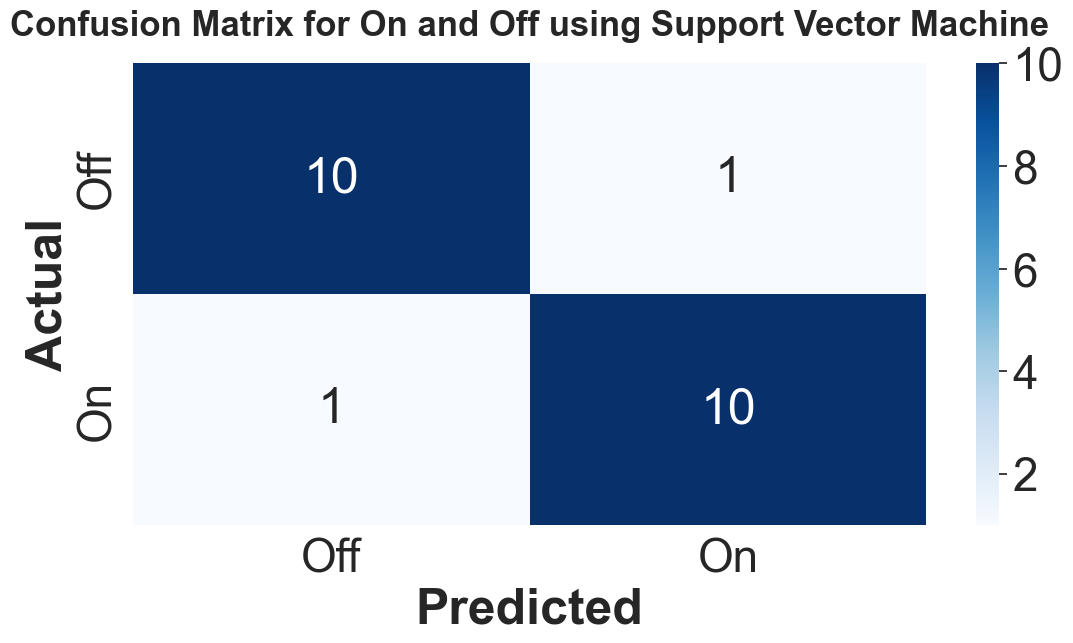

In [95]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle

def plot_confusion_matrix(matrix, actual_classes, predicted_classes, sorted_labels):
    plt.figure(figsize=(12.8,6))
    sns.set(font_scale= 3)
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted', fontweight = 'bold' )
    plt.ylabel('Actual', fontweight = 'bold')
    plt.title('Confusion Matrix for On and Off using Support Vector Machine',  pad=20, fontsize= 25, fontweight = 'bold')
    plt.show()

# Fit the SVM model
svm = LinearSVC(dual = False)
svm.fit(X_train.values, y_train.values)

#print("Features:", X_train.columns) # <-- print the features
print("Features:", X_train.columns.values)
# Make predictions on the test set
y_pred_svm = svm.predict(X_test.values)

# Generate the confusion matrix plot
cm = confusion_matrix(y_test, y_pred_svm)
sorted_labels = ['Off', 'On']

plot_confusion_matrix(cm, y_test, y_pred_svm, sorted_labels)

# Export the SVM model as a pickle file
filename = 'svm_model.sav'
pickle.dump(svm, open(filename, 'wb'))
